## Установка PySpark

In [1]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [69.5 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

In [4]:
!tar -xvf spark-3.1.2-bin-hadoop2.7.tgz

spark-3.1.2-bin-hadoop2.7/
spark-3.1.2-bin-hadoop2.7/R/
spark-3.1.2-bin-hadoop2.7/R/lib/
spark-3.1.2-bin-hadoop2.7/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/R/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/R/SparkR
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdx
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/R/SparkR.rdb
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/Meta/
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/Meta/features.rds
spark-3.1.2-bin-hadoop2.7/R/lib/SparkR/Meta/pac

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [9]:
df = spark.read.csv('iris.CSV', inferSchema=True, header=True)

In [10]:
df.show(5)

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [11]:
df_pr_max = df.groupBy('variety').max('sepal_length','sepal_width','petal_length','petal_width')
df_pr_max.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [12]:
df_pr_min = df.groupBy('variety').min('sepal_length','sepal_width','petal_length','petal_width')
df_pr_min.show()

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [13]:
df_pr_avg = df.groupBy('variety').avg('sepal_length','sepal_width','petal_length','petal_width')
df_pr_avg.show()

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [14]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


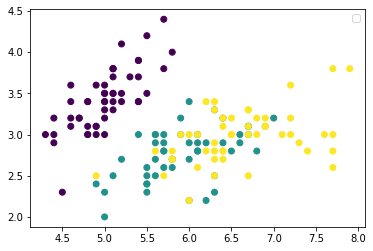

In [17]:
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())
plt.legend(c)

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

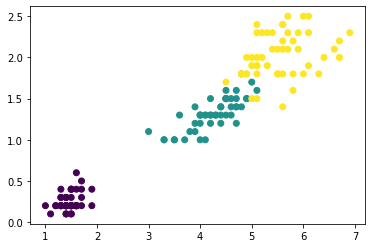

In [16]:
plt.scatter(df[['petal_length']].collect(), df[['petal_width']].collect(), c=df[['variety_num']].collect())

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [18]:
from pyspark.sql.functions import when

In [25]:
# исходя из полученных графиков, сформулируем гипотезу: 
# если длина лепестка (petal_length) < 2, то это "Setosa"

df_pred = df.withColumn("prediction", when(df['petal_length'] < 2,"Setosa")
                                      .otherwise("Unknown"))
df_pred.show(55)

+------------+-----------+------------+-----------+----------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   variety|variety_num|prediction|
+------------+-----------+------------+-----------+----------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2|    Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2|    Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2|    Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2|    Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2|    Setosa|          0|    Setosa|
|         5.4|        3.9|         1.7|        0.4|    Setosa|          0|    Setosa|
|         4.6|        3.4|         1.4|        0.3|    Setosa|          0|    Setosa|
|         5.0|        3.4|         1.5|        0.2|    Setosa|          0|    Setosa|
|         4.4|        2.9|         1.4|        0.2|   

## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [33]:
#общее количество строк с эталонным(правильным) классом Setosa (знаменатель):
predictions_rows_count_Setosa = df_pred.where(df_pred['variety'] == "Setosa").count()
#количество строк, в которых предсказание семейства совпало с истинным значением (числитель)
predictions_rows_count_right = df_pred.where(df_pred['variety'] == df_pred['prediction']).count()
print(f'Количество строк, где мы предсказали класс Setosa и правильный класс был также Setosa: {predictions_rows_count_right} шт.')
accuracy = predictions_rows_count_right/predictions_rows_count_Setosa * 100
print(f'Точность гипотезы: {accuracy}%')

Количество строк, где мы предсказали класс Setosa и правильный класс был также Setosa: 50 шт.
Точность гипотезы: 100.0%


In [35]:
#количество строк, в которых предсказание семейства НЕ совпало с истинным значением
predictions_rows_count_bad = df_pred.where((df_pred['variety'] == "Setosa") & (df_pred['variety'] != df_pred['prediction'])).count()
print(f'Количество строк, где мы предсказали класс Setosa, но правильный класс был другим : {predictions_rows_count_bad} шт.')

Количество строк, где мы предсказали класс Setosa, но правильный класс был другим : 0 шт.
